## Bike Capital Share

### Features:
- datetime - hourly date + timestamp  
- season:
    - 1 = spring
    - 2 = summer
    - 3 = fall
    - 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather: 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals --> to be predicted

## Setup

In [127]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [128]:
df_train = pd.read_csv('bikes_train.csv') 
df_test = pd.read_csv('bikes_test.csv')

In [129]:
df_train.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

In [131]:
# convert datetime column to datetime
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

In [132]:
# extract y/m/d/h from datetime
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour

In [133]:
# make datetime index
df_train = df_train.set_index('datetime')

In [134]:
df_train.tail()

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2012-12-19 19:00:00       4        0           1        1  15.58  19.695   
2012-12-19 20:00:00       4        0           1        1  14.76  17.425   
2012-12-19 21:00:00       4        0           1        1  13.94  15.910   
2012-12-19 22:00:00       4        0           1        1  13.94  17.425   
2012-12-19 23:00:00       4        0           1        1  13.12  16.665   

                     humidity  windspeed  casual  registered  count  year  \
datetime                                                                    
2012-12-19 19:00:00        50    26.0027       7         329    336  2012   
2012-12-19 20:00:00        57    15.0013      10         231    241  2012   
2012-12-19 21:00:00        61    15.0013       4         164    168  2012   
2012-12-19 22:00:00        61     6.0032      12         117    129  2012   
2012-12-19 23:00:00        66     8.9981       4          84     88  2012   

                     month  day  hour  
datetime                               
2012-12-19 19:00:00     12   19    19  
2012-12-19 20:00:00     12   19    20  
2012-12-19 21:00:00     12   19    21  
2012-12-19 22:00:00     12   19    22  
2012-12-19 23:00:00     12   19    23

## EDA

In [135]:
df_train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count          year         month           day          hour  
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  
mean     191.574132   2011.501929      6.521495      9.992559     11.541613  
std      181.144454      0.500019      3.444373      5.476608      6.915838  
min        1.000000   2011.000000      1.000000      1.000000      0.000000  
25%       42.000000   2011.000000      4.000000      5.000000      6.000000  
50%      145.000000   2012.000000      7.000000     10.000000     12.000000  
75%      284.000000   2012.000000     10.000000     15.000000     18.000000  
max      977.000000   2012.000000     12.000000     19.000000     23.000000

<AxesSubplot:>

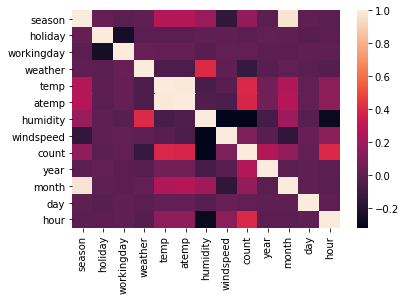

In [88]:
# correlation matrix (all features)
sns.heatmap(df_train.corr())

<AxesSubplot:>

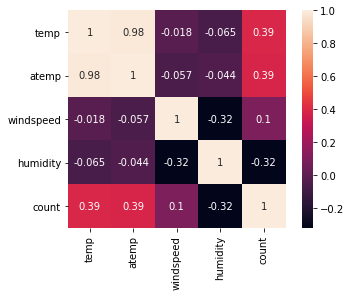

In [89]:
# correlation matrix (continuous)

sns.heatmap(df_train[['temp','atemp','windspeed','humidity','count']].corr(), square=True, annot=True)

The correlation matrix reveals:
- a negative correlation between count and weather, as well as humidity.
- a positive correlation between count and temperature, as well as hour.

In [40]:
# All values increase in year 2012, but the patterns stay the same. Also, there is missing data from 2012, which is included in the test dataset. So I'll analyze only data from 2011.
# Create a slice from the 1.1.2011 - 31.12.2011

#X_train_2011 = X_train['2011-01-01':'2011-12-31']

## MONTH

In [136]:
df_train['month'].value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

<AxesSubplot:title={'center':'avg. bike count per month'}, xlabel='month', ylabel='bike count'>

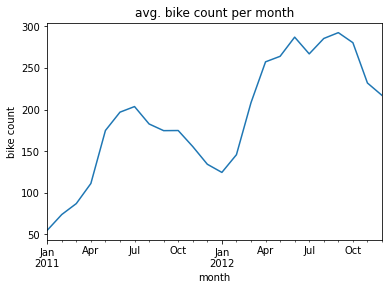

In [53]:
df_train['count'].resample('M').mean().plot(title='avg. bike count per month', xlabel='month', ylabel='bike count')

<AxesSubplot:xlabel='month', ylabel='count'>

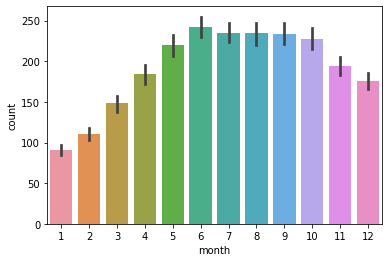

In [71]:
sns.barplot(data=df_train, y='count', x='month', orient='v')

## DAY

<AxesSubplot:title={'center':'avg. bike count per day'}, xlabel='day', ylabel='bike count'>

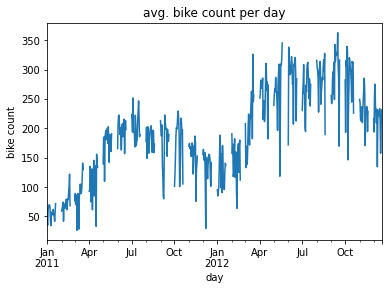

In [54]:
df_train['count'].resample('D').mean().plot(title='avg. bike count per day', xlabel='day', ylabel='bike count')

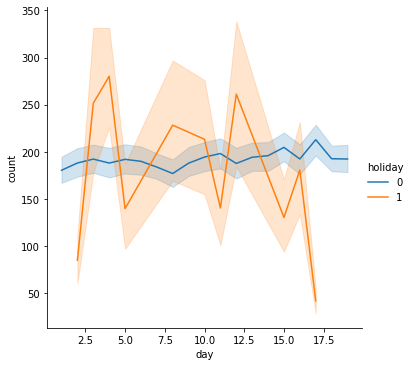

In [108]:
sns.relplot(x="day", y="count", hue='holiday', kind="line", data=df_train)

<AxesSubplot:xlabel='day', ylabel='count'>

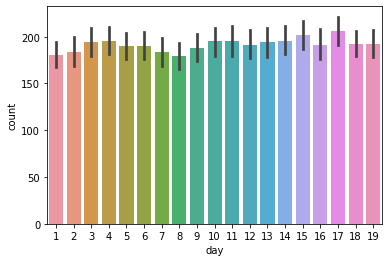

In [72]:
sns.barplot(data=df_train, y='count', x='day', orient='v')

<AxesSubplot:xlabel='time'>

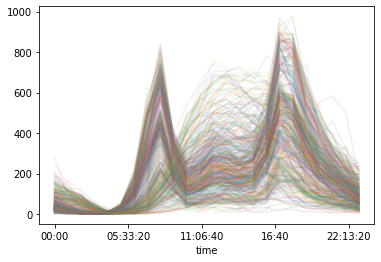

In [141]:
# plot all bike demands of each day per hour

train_pivoted = df_train.pivot_table('count', index=df_train.index.time, columns=df_train.index.date)
train_pivoted.plot(legend=False, alpha=0.1)

## HOUR

<AxesSubplot:title={'center':'avg. bike count per hour'}, xlabel='month', ylabel='bike count'>

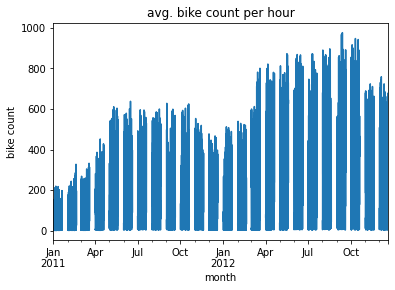

In [55]:
df_train['count'].resample('H').mean().plot(title='avg. bike count per hour', xlabel='month', ylabel='bike count')

<AxesSubplot:xlabel='hour', ylabel='count'>

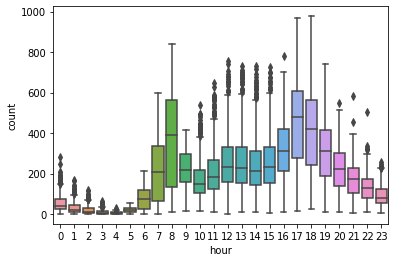

In [68]:
sns.boxplot(data=df_train, y='count', x='hour', orient='v')

<AxesSubplot:xlabel='hour', ylabel='count'>

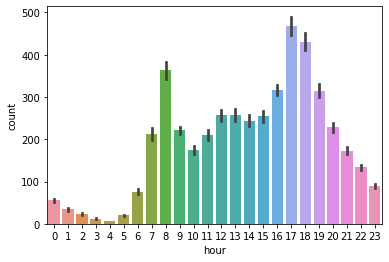

In [70]:
sns.barplot(data=df_train, y='count', x='hour', orient='v')

<AxesSubplot:xlabel='time'>

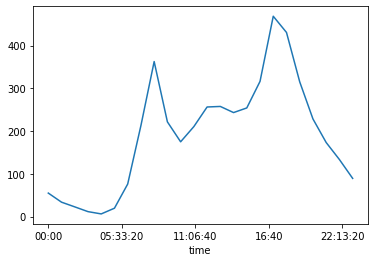

In [139]:
df_train['count'].groupby(df_train.index.time).mean().plot()

There are two peak hours in bike demands, 8:00 and 17:00, which indicate commute time for regular working hours.

## SEASON

In [56]:
(df_train.groupby('season')['count']).median()

season
1     78
2    172
3    195
4    161
Name: count, dtype: int64

<AxesSubplot:title={'center':'Avg. bike count per season'}, xlabel='season', ylabel='Bike count'>

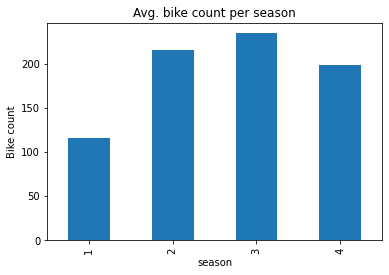

In [57]:
(df_train.groupby('season')['count']).mean().plot(kind='bar', title='Avg. bike count per season', xlabel='season', ylabel='Bike count')

<AxesSubplot:xlabel='season', ylabel='count'>

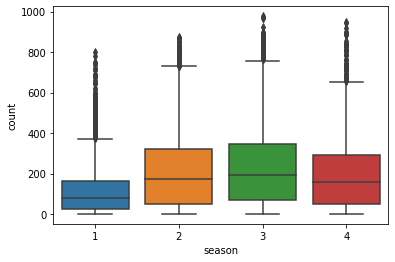

In [67]:
sns.boxplot(data=df_train, y='count', x='season', orient='v')

- The highest bike demand is in the fall, whereas the lowest is in spring.

## HOLIDAY	

In [58]:
(df_train.groupby('holiday')['count']).median()

holiday
0    145
1    133
Name: count, dtype: int64

<AxesSubplot:xlabel='holiday', ylabel='count'>

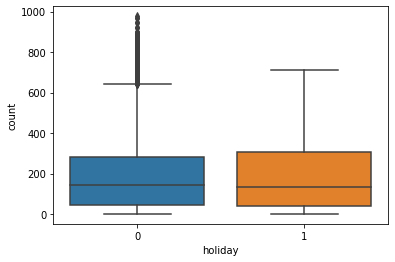

In [76]:
sns.boxplot(data=df_train, y='count', x='holiday', orient='v')

<AxesSubplot:title={'center':'Avg. bike count per day type'}, xlabel='holiday', ylabel='Bike count'>

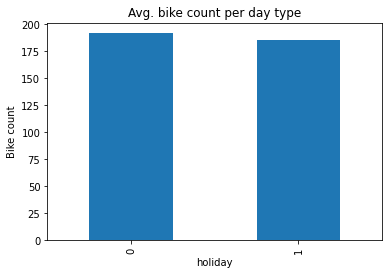

In [59]:
(df_train.groupby('holiday')['count']).mean().plot(kind='bar', title='Avg. bike count per day type', xlabel='holiday', ylabel='Bike count')

There is slightly less demand for bikes on holidays than in the rest of the days. Maybe because people rent bikes to go to work, which is not the case on holidays.

## WORKING DAY	

<AxesSubplot:title={'center':'Avg. bike count per working day'}, xlabel='season', ylabel='Bike count'>

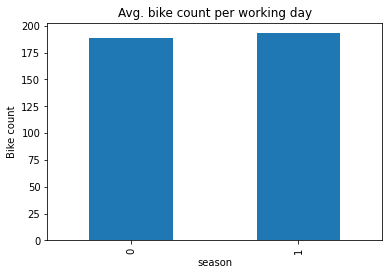

In [29]:
(df_train.groupby('workingday')['count']).mean().plot(kind='bar', title='Avg. bike count per working day', xlabel='working day', ylabel='Bike count')

<AxesSubplot:xlabel='hour', ylabel='count'>

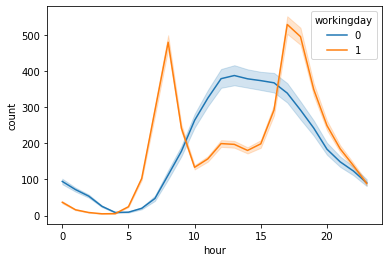

In [112]:
sns.lineplot(x="hour", y="count", hue='workingday', data=df_train)

There is slightly more demand for bikes on working days than in the weekend. 

## WEATHER	

In [35]:
(df_train.groupby('weather')['count']).median()

weather
1    161
2    134
3     71
4    164
Name: count, dtype: int64

<AxesSubplot:title={'center':'Avg. bike count per weather condition'}, xlabel='weather', ylabel='Bike count'>

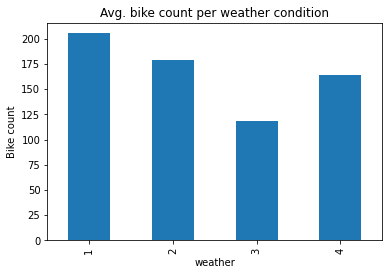

In [30]:
(df_train.groupby('weather')['count']).mean().plot(kind='bar', title='Avg. bike count per weather condition', xlabel='weather', ylabel='Bike count')

<AxesSubplot:xlabel='weather', ylabel='count'>

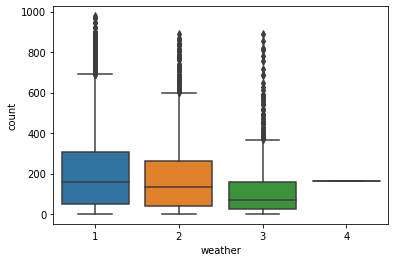

In [75]:
sns.boxplot(data=df_train, y='count', x='weather', orient='v')

- The highest bike demand is good weather conditions (clear sky or partly cloudy). 
- The lowest bike demand is on rainy days. 
- The bike demand is quite similar on days with mist and with snow/thunderstorms. 

## TEMPERATURE

<AxesSubplot:xlabel='temp', ylabel='count'>

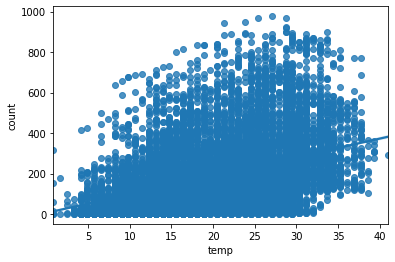

In [102]:
sns.regplot(x='temp', y='count', data=df_train)

<AxesSubplot:xlabel='atemp', ylabel='count'>

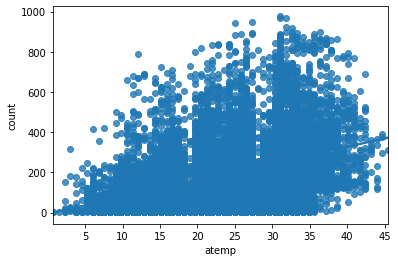

In [103]:
sns.regplot(x='atemp', y='count', data=df_train)

## HUMIDITY	

<AxesSubplot:xlabel='windspeed', ylabel='count'>

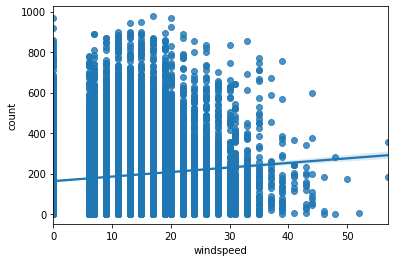

In [101]:
sns.regplot(x='windspeed', y='count', data=df_train)

## WIND SPEED

<AxesSubplot:xlabel='windspeed', ylabel='count'>

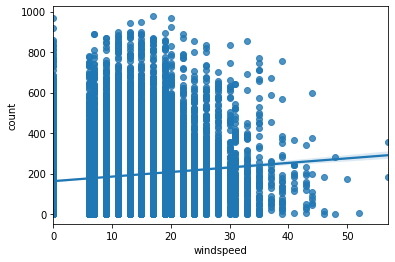

In [100]:
sns.regplot(x='windspeed', y='count', data=df_train)